[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_03_arboles_de_decision_sklearn-published.ipynb)

## Scikit-learn (sklearn)

### Primera aplicación, clasificación de "iris"

El dataset Fisher's Iris es un conjunto de datos multivariado introducido por Ronald Fisher en su paper de 1936 *The use of multiple measurements in taxonomic problems* como un ejemplo de análisis discriminante lineal.


![Representación de las flores del data set](https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/notebooks/n03-iris.png)



El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros y además se tiene el nombre de la especie a la que pertence. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

Antes de empezar, cargamos todas las bibliotecas que vamos a usar. Como iris es un dataset muy común, forma parte de los datasets que provee `sklearn`.


Acá vemos como cargarlo:

In [2]:
# Cargamos algunas bibliotecas 
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5] # para ver los gráficos más grandes

# Cargamos el dataset que usaremos hoy
from sklearn.datasets import load_iris
iris_dataset = load_iris()

### Antes de empezar: exploración del objeto ```iris_dataset```

1. ¿Qué tipo de objeto es `iris_dataset`?
1. Listar las claves que tiene.
1. Listar los valores que puede tomar la variable `target` (las que vamos a querer aprender).
1. Listar los atributos del dataset.
1. ¿Qué hay en las primeras 5 filas?
1. ¿Qué dimensión tiene el dataset?
1. ¿Cuál es el `target` en las últimas 5 filas?

Además, hay una descripción del dataset incluida en el objeto que se puede acceder con: `iris_dataset.DESCR`.


In [3]:
print("*******\n", f"Tipo de objeto: {type(iris_dataset)}")
print("*******\n", f"Claves: {iris_dataset.keys()}")

print("*******\n", f"Valores de target: {set(iris_dataset['target'])}")
print("*******\n", f"Atributos: {iris_dataset['feature_names']}")
print("*******\n", f"Primeras 5 filas: \n{iris_dataset['data'][:5]}")
print("*******\n", f"Dimensión: {iris_dataset['data'].shape}")
print("*******\n", f"Target en las últimas 5 filas: {iris_dataset['target'][-5:]}")

print("*******\n", f"Descripción: {iris_dataset['DESCR']}")

*******
 Tipo de objeto: <class 'sklearn.utils._bunch.Bunch'>
*******
 Claves: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
*******
 Valores de target: {np.int64(0), np.int64(1), np.int64(2)}
*******
 Atributos: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
*******
 Primeras 5 filas: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
*******
 Dimensión: (150, 4)
*******
 Target en las últimas 5 filas: [2 2 2 2 2]
*******
 Descripción: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
     

### Paso 1: División de datos (training - testing)

Ya veremos en las próximas clases de la materia, pero una forma de mitigar la percepción de cuán bien (o mal) anda nuestro modelo, es separar nuestros datos en 2:

  - una parte para mirar, entender y **entrenar**
  - otra parte que solo usaremos para medir la performance

(más detalles en breve)

<img src="https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/notebooks/n03-train-test-split.png"  width="600">
Fuente imagen: https://www.sharpsightlabs.com/blog/scikit-train_test_split/


Para esto usaremos la función `train_test_split` de `sklearn` [(ver Documentación)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) y generaremos:
  - `X_train`: es una matriz con un subconjunto del dataset original con los atributos de las observaciones 
  - `y_train`: es un vector con la clase a la que corresponde cada instancia de `X_train` 
  - `X_test`: es el subconjunto restante del dataset original que no fue incluido en `X_train`
  - `y_test`: es un vector con la clase a la que corresponde cada instancia de `X_test` 

In [4]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                    iris_dataset['data'], 
                    iris_dataset['target'], 
                    random_state=4, 
                    test_size=0.1)

Podemos verificar que los tamaños para ver que coinciden con lo previsto. Sugerencia: explorar los objetos.

In [5]:
print(f"X_train dimensión: {X_train.shape}")
print(f"y_train dimensión: {y_train.shape}")

print(f"X_test dimensión: {X_test.shape}")
print(f"y_test dimensión: {y_test.shape}")

X_train dimensión: (135, 4)
y_train dimensión: (135,)
X_test dimensión: (15, 4)
y_test dimensión: (15,)


In [6]:
print(f"Train cantidad de cada clase: {np.unique(y_train, return_counts=True)}")
print(f"Test cantidad de cada clase: {np.unique(y_test, return_counts=True)}")

Train cantidad de cada clase: (array([0, 1, 2]), array([44, 47, 44]))
Test cantidad de cada clase: (array([0, 1, 2]), array([6, 3, 6]))


**Pregunta** 

¿Qué orden tienen los datos en esta partición? ¿Preservan el mismo orden? *Hint* Ver documentación de `train_test_split`

In [7]:
sklearn.model_selection.train_test_split?
"""
shuffle : bool, default=True
    Whether or not to shuffle the data before splitting. If shuffle=False
    then stratify must be None.

stratify : array-like, default=None
    If not None, data is split in a stratified fashion, using this as
    the class labels.
    Read more in the :ref:`User Guide <stratification>`.
"""

'\nshuffle : bool, default=True\n    Whether or not to shuffle the data before splitting. If shuffle=False\n    then stratify must be None.\n\nstratify : array-like, default=None\n    If not None, data is split in a stratified fashion, using this as\n    the class labels.\n    Read more in the :ref:`User Guide <stratification>`.\n'

### Paso 2: Exploración de los datos

Como vimos anteriormente, los datos se encuentran dentro de un _array_ de `numpy`. Podemos pasarlo a un dataframe de `pandas` para tener una mejor visualización.


In [8]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,3.1,1.5,0.2
1,5.0,2.0,3.5,1.0
2,4.7,3.2,1.3,0.2
3,4.8,3.4,1.9,0.2
4,6.3,2.7,4.9,1.8
5,5.0,3.2,1.2,0.2
6,6.7,3.3,5.7,2.1
7,6.2,2.2,4.5,1.5
8,5.0,3.4,1.6,0.4
9,4.7,3.2,1.6,0.2


Antes de empezar a construir un clasificador, realicemos una breve exploración de los datos:

1. ¿qué se ve en el siguiente gráfico?
1. ¿cuántas clases hay?
1. ¿qué variable (o pares de variables) parecen separar mejor a los datos?


In [9]:
y_train

array([0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2,
       1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2])

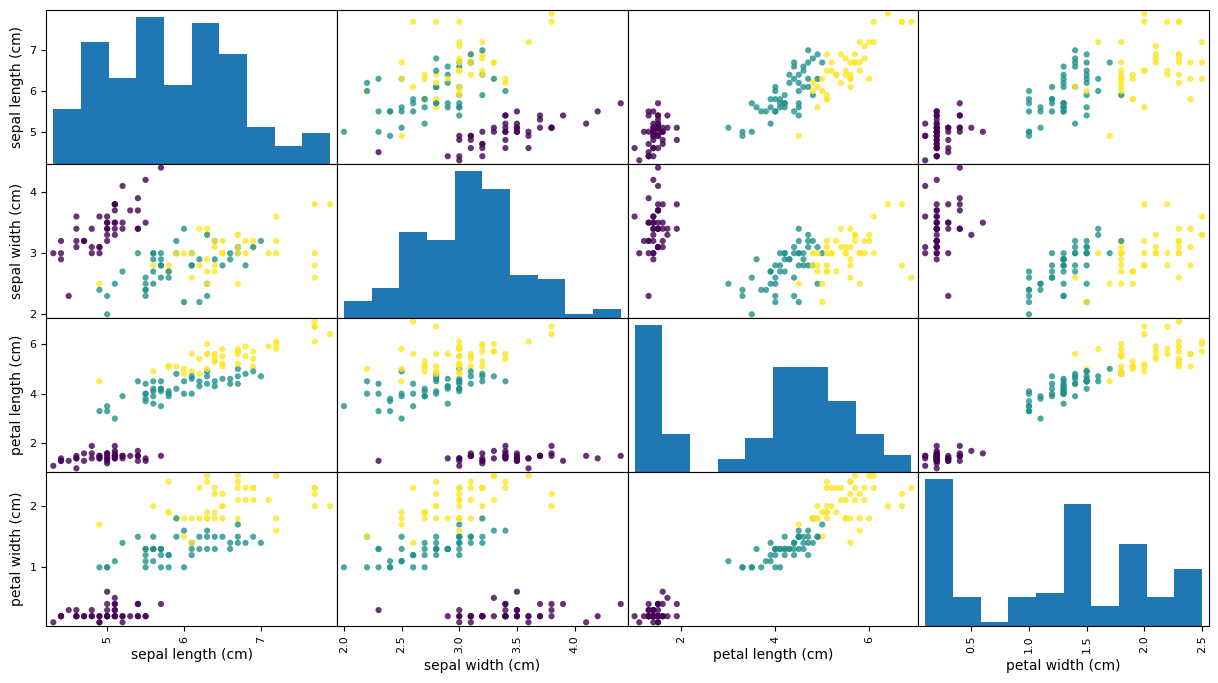

In [10]:
# 1. Se ve una clara diferencia para la clase rosa (el cero?) en muchas de las variables, en especial en petal length / petal width
# 2. Hay 3 clases
# 3. petal length / petal width 

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, s=80, figsize=(15, 8), alpha=.8);

### Paso 3: Construcción de un modelo 

Para construir nuestro árbol creamos un objeto de la clase [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) a la que más tarde cambiaremos parámetros.

En este punto definimos que:
  - la profundidad máxima del árbol será 3
  - que el criterio para la selección en cada nodo sera `entropy`
  


In [11]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")

Una vez creado nuestro clasificador, debemos entrenarlo con el método `fit`. 

Es interesante mencionar que en `sklearn` siempre usaremos `fit()` para entrenar pasandole los datos. La configuración vendrá en el constructor.

**Antes** de ejecutar `fit` explorar `arbol.fit?`.

In [12]:
arbol.fit?

In [13]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Paso 4: Predicciones

Si queremos predecir una nueva instancia, por ejemplo:

In [14]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape: {X_new.shape}")

X_new.shape: (1, 4)


Necesitamos contar con nuestro clasificador (previamente entrenado) e invocar a `predict` con la(s) instancia(s) que queremos predecir.

**Antes** de ejecutar `predict` explorar `arbol.predict?`.

In [15]:
arbol.predict?

In [16]:
prediction = arbol.predict(X_new)
print(f"Predicción: {prediction}")
print(f"Nombre de la clase predicha: {iris_dataset['target_names'][prediction]}")

Predicción: [0]
Nombre de la clase predicha: ['setosa']


### Paso 5: Evaluación del modelo

Ahora ya estamos listos para poder verificar la performance de nuestro árbol con los datos que habíamos separado para _test_ previamente.

In [17]:
# predecimos los valores para las instacias que no vimos
y_pred = arbol.predict(X_test)

print(f"Predicciones:   {y_pred}\nValores reales: {y_test}")
# Podemos calcular el accuracy (exactitud) comparando los valores predichos contra los reales, 
# para ello contamos cuántas coincidencias hubo y dividimos por la cantidad de comparaciones que hicimos:
print(f"Accuracy sobre el test set: {np.mean(y_pred == y_test)}") 

#También podemos invocar al método score que viene con los DecisionTreeClassifier
print(f"Accuracy sobre el test set: {arbol.score(X_test, y_test)}") 

Predicciones:   [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2]
Valores reales: [2 0 2 2 2 1 1 0 0 2 0 0 0 1 2]
Accuracy sobre el test set: 0.9333333333333333
Accuracy sobre el test set: 0.9333333333333333


Podemos observar el resultado de nuestra clasificación con las matrices de confusión que tienen:
- cada fila los valores observados o reales
- cada columna los valores predichos

que si integramos esta información nos da:
- $m_{i,i}$ las instancias bien clasificadas
- $m_{i,j}\ (con\ i\neq j)$ las instancias mal clasificadas

Ej. si tenemos la siguiente matriz de confusión:

||setosa|versicolor|virginica|
|-----|-----|-----|-----|
|**setosa**| 6 | 0 | 0 |
|**versicolor**| 0 | 2 | 1 |
|**virginica**| 0 | 0 | 6 | 

Podemos decir que todas las instancias de la clases **setosa** y **virginica** fueron correctamente clasificadas, mientras que para las de **versicolor** 2 fueron correctas, mientras que una fue clasificada con **virginica** fallando en este caso la predicción.

Si sumamos por filas podemos ver que en _test_ tenemos: 
  - 6 de clase **setosa**
  - 3 de clase **versicolor** 
  - 6 de clase **virginica**
  
Y si sumamos por columna podemos ver la cantidad predicha para cada clase:
  - 6 de clase **setosa**
  - 2 de clase **versicolor** 
  - 7 de clase **virginica**
  

In [18]:
print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=iris_dataset['target_names'], index=iris_dataset['target_names']))

Matriz de confusión:


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,2,1
virginica,0,0,6


### En resumen

1. separamos nuestro data set original en entrenamiento (_train_) y evaluación (_test_)
1. armamos y entrenamos (`fit`) un árbol de decisión con parámetros:
    - `max_depth=3`
    - `criterion="entropy"`
1. evaluamos el árbol en el conjunto de entrenamiento y de evaluación

In [19]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=4, test_size=0.1)

arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")
arbol.fit(X_train, y_train)

print(f"Score sobre el training set: {arbol.score(X_train, y_train):.2f} ¿qué indica este número?")
print("\t Indica la proporción de instancias correctamente clasificadas en el conjunto de entrenamiento, qué tanto over/underfitting tenemos")
print(f"Score sobre el test set: {arbol.score(X_test, y_test):.2f}  ¿qué indica este número?")
print("\t Indica la proporción de instancias correctamente clasificadas en el conjunto de test, una medida de la generalización del modelo")


Score sobre el training set: 0.98 ¿qué indica este número?
	 Indica la proporción de instancias correctamente clasificadas en el conjunto de entrenamiento, qué tanto over/underfitting tenemos
Score sobre el test set: 0.93  ¿qué indica este número?
	 Indica la proporción de instancias correctamente clasificadas en el conjunto de test, una medida de la generalización del modelo


### Experimentando con Árboles de Decisión: 

1. Probar distintos valores para: `max_depth` y graficar la performance (_accuracy_) sobre el conjunto de test al variar este parámetro. 
1. ¿Qué ocurre con la _accuracy_ sobre train con respecto al valor sobre test de un mismo clasificador? 
1. ¿Cuál es el máximo valor de profundidad que se alcanza?¿cómo lo obtengo?¿por qué? 
    Para responder estas pregunta se puede acceder a la documentación con el comando `sklearn.tree.DecisionTreeClassifier?`
1. Graficar la importancia de features para el clasificador con mejor _Accuracy_ en el test_set. Explorar el atributo `feature_importances_` de un árbol entrenado, ¿qué atributos fueron los mas relevantes? ¿es el mismo método que el visto en clase?
1. Evaluar la importancia de features utilizando `permutation_importance`, graficar.
    
1. Graficar el árbol obtenido (ver función `dibujar_arbol` provista en la próxima celda). 

    1. ¿qué representa cada nodo?
    1. ¿qué información contiene cada nodo?
    1. ¿qué representa el color?
    1. ¿qué son los ejes?

In [20]:
# !pip3 install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from six import StringIO  #pip3 install six
##### from sklearn.externals.six import StringIO  # opción para versiones más viejas de sklearn
from IPython.display import Image, display
import pydotplus

    
def dibujar_arbol(clf, c_name=iris_dataset.target_names, f_name=iris_dataset.feature_names):
    #
    # modo de uso: dibujar_arbol(arbol)
    #
    dot_data = StringIO()
    sklearn.tree.export_graphviz(clf, out_file = dot_data,  
                    filled = True, 
                    class_names = c_name,
                    feature_names = f_name,
                    special_characters = True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [21]:
# 1. Probar distintos valores para: `max_depth` y graficar la performance (_accuracy_) sobre el conjunto de test al variar este parámetro. 
# llega a un tope en depth 2
max_depths = range(1, 10)
arboles = []

for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    arbol.fit(X_train, y_train)
    arboles.append(arbol)

test_scores = [arbol.score(X_test, y_test) for arbol in arboles]
data_resp = pd.DataFrame(test_scores, index=max_depths, columns=["Test Accuracy"])
data_resp

,Test Accuracy
1,0.600000
2,0.933333
3,0.933333
4,0.933333
5,0.933333
6,0.933333
7,0.933333
8,0.933333
9,0.933333


In [22]:
# 2. ¿Qué ocurre con la _accuracy_ sobre train con respecto al valor sobre test de un mismo clasificador?
# es mayor en train que en test, tiene sentido porque el modelo se ajusta a los datos de entrenamiento
# a partir de depth 4 el modelo empieza a overfittear (de todas maneras performa bien en test, quizas de casualidad)
train_scores = [arbol.score(X_train, y_train) for arbol in arboles]
data_resp["Train Accuracy"] = train_scores
data_resp

,Test Accuracy,Train Accuracy
1,0.600000,0.674074
2,0.933333,0.962963
3,0.933333,0.977778
4,0.933333,1.000000
5,0.933333,1.000000
6,0.933333,1.000000
7,0.933333,1.000000
8,0.933333,1.000000
9,0.933333,1.000000


In [23]:
# 3. ¿Cuál es el máximo valor de profundidad que se alcanza?¿cómo lo obtengo?¿por qué?
""" sklearn.tree.DecisionTreeClassifier?
max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:
    
El máximo es 4, son 4 atributos pero acá se puede repetir (son valores continuos) así que en ppio no es por eso.
A partir de 4 el modelo llega al 100% de accuracy en train así que se podría deber a eso (ya no tiene sentido seguir dividiendo). 
    """
arbol_max_d = DecisionTreeClassifier(criterion="entropy")
arbol_max_d.fit(X_train, y_train)
print(f"Profundidad máxima: {arbol_max_d.get_depth()}")
print(f"Número de hojas: {arbol_max_d.get_n_leaves()}, para una cantidad de instancias de {X_train.shape[0]}")

Profundidad máxima: 4
Número de hojas: 8, para una cantidad de instancias de 135


In [31]:
# Graficar la importancia de features para el clasificador con mejor _Accuracy_ en el test_set. Explorar el atributo `feature_importances_` de un árbol entrenado, ¿qué atributos fueron los mas relevantes? ¿es el mismo método que el visto en clase?
# petal width, no es el mismo método que en clase porque vimos gini? no sé bien si se refiere a eso la pregunta
arbol = arboles[1]
importance = arbol.feature_importances_
print(f"Importancia de los atributos: {importance}")
# atributo mas importante
print(f"Atributo más importante: {iris_dataset.feature_names[np.argmax(importance)]}")

Importancia de los atributos: [0. 0. 0. 1.]
Atributo más importante: petal width (cm)


In [35]:
sklearn.tree.DecisionTreeClassifier.feature_importances_?

### Sobre fronteras de decisión

A continuación exploraremos dentro del dataset iris el funcionamiento de las fronteras de decisión.
Para hacerlo nos quedaremos sólo con 2 dimensiones del dataset: `sepal length (cm)`, `sepal width (cm)`.

En la próxima celda tenemos la función `explore_decision_tree_boundaries` que si es llamada sin parámetros corre un árbol de clasificación con los parámetros por defecto del mismo y genera una representación de como el plano conformado por las 2 dimensiones propuesta se dividen en las clases que predecirán y árbol que generó dichas fronteras.

Explorar diversos valores permitidos de profundidad máxima permitido del árbol del clasificador y analizar las visualizaciones generadas en términos de: 
  - sobreajuste
  - subajuste

In [25]:
from sklearn.inspection import DecisionBoundaryDisplay

def explore_decision_tree_boundaries(max_depth=None, criterion="entropy", data_set=iris_dataset, cols=[0, 1]):
    n_classes, plot_colors, plot_step = 3, "ryb", 0.02
    fig=plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')
    
    X = data_set["data"][:, cols]
    y = data_set["target"]

    # Build and train Classifier
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(1, 1, 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        tree,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=data_set.feature_names[cols[0]],
        ylabel=data_set.feature_names[cols[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=data_set.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

    plt.suptitle(f"Fronteras de decisión de un árbol de altura {tree.get_depth()} y #hojas: {tree.get_n_leaves()}")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")
    plt.show()
    
    dibujar_arbol(tree, f_name=[data_set.feature_names[cols[0]],data_set.feature_names[cols[1]]]
                 )
    


Ejecutar la función y luego explorar como cambia el comportamiento al modificar los parámetros por defecto:
  - `max_depth`
  - `criterion`

Las fronteras de decisión son más complejas a medida que aumenta la profundidad del árbol, gini parece generar fronteras más complejas que entropy.

Profundidad: 1, criterio: entropy


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


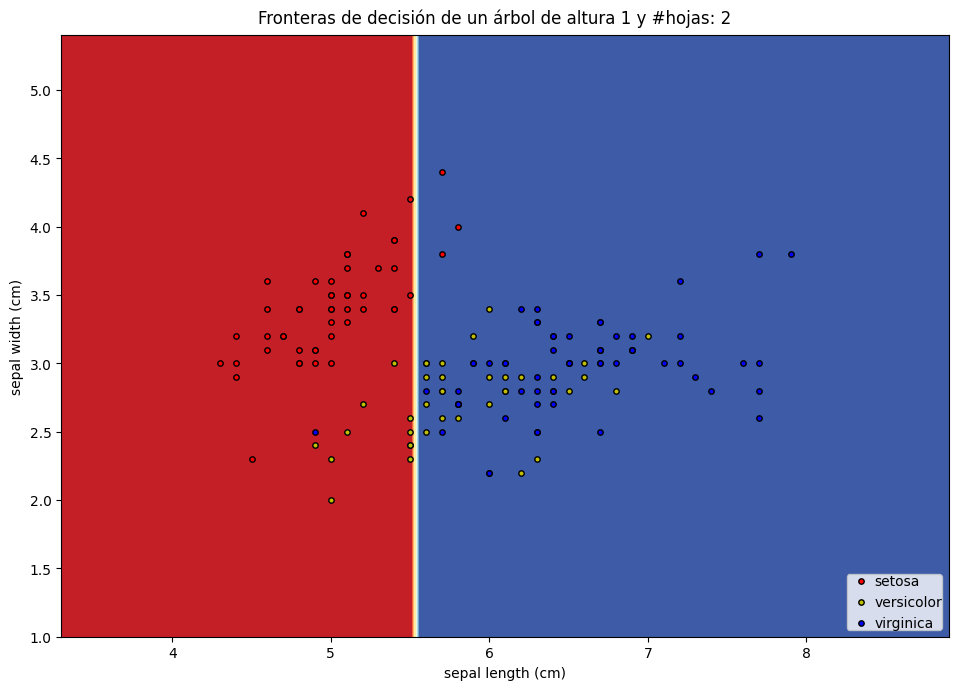

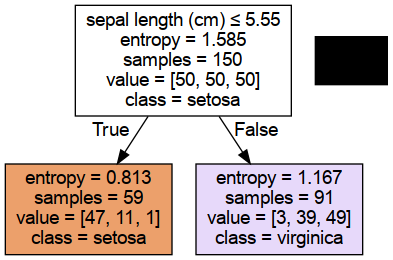

Profundidad: 1, criterio: gini


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


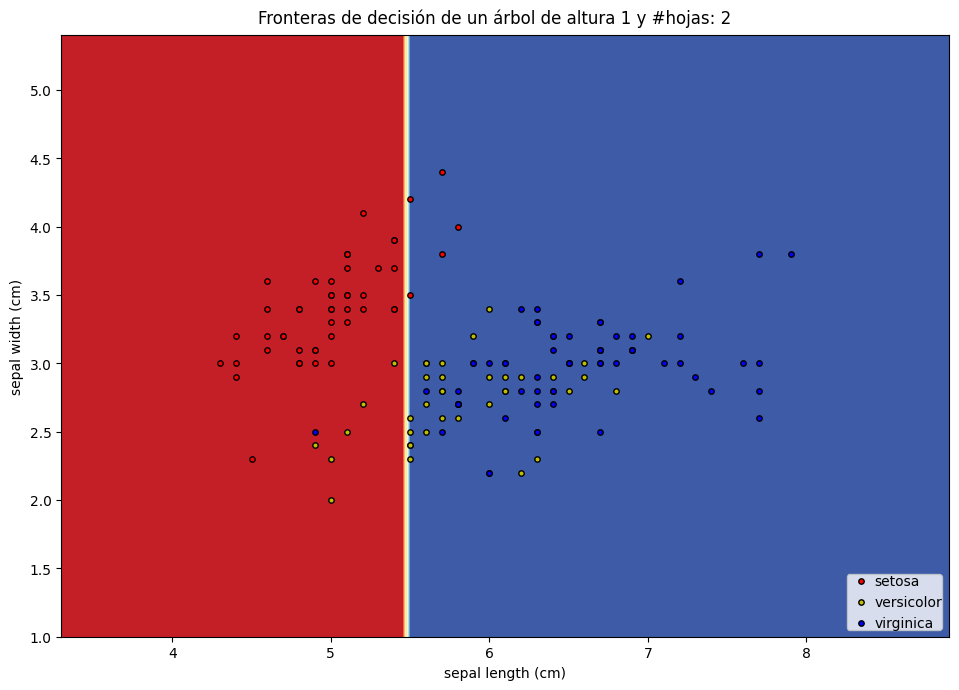

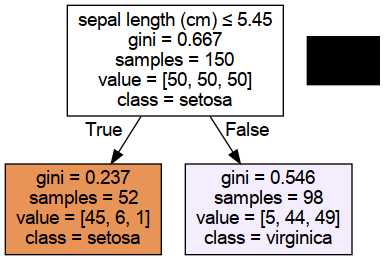

Profundidad: 2, criterio: entropy


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


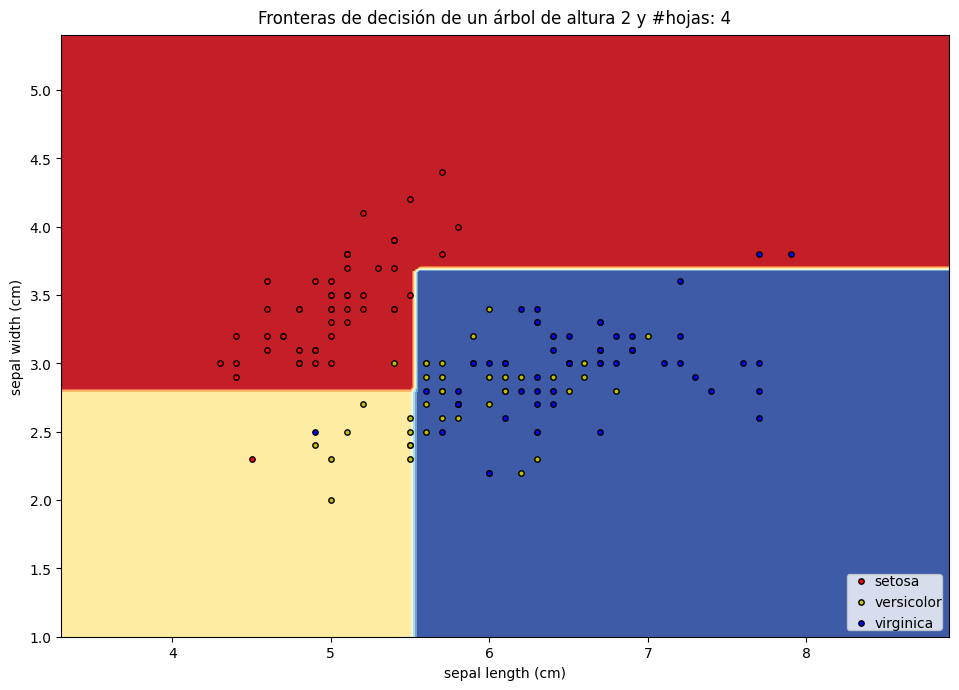

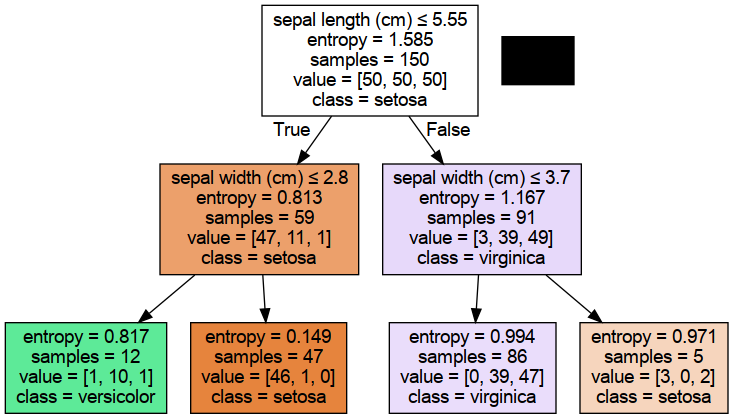

Profundidad: 2, criterio: gini


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


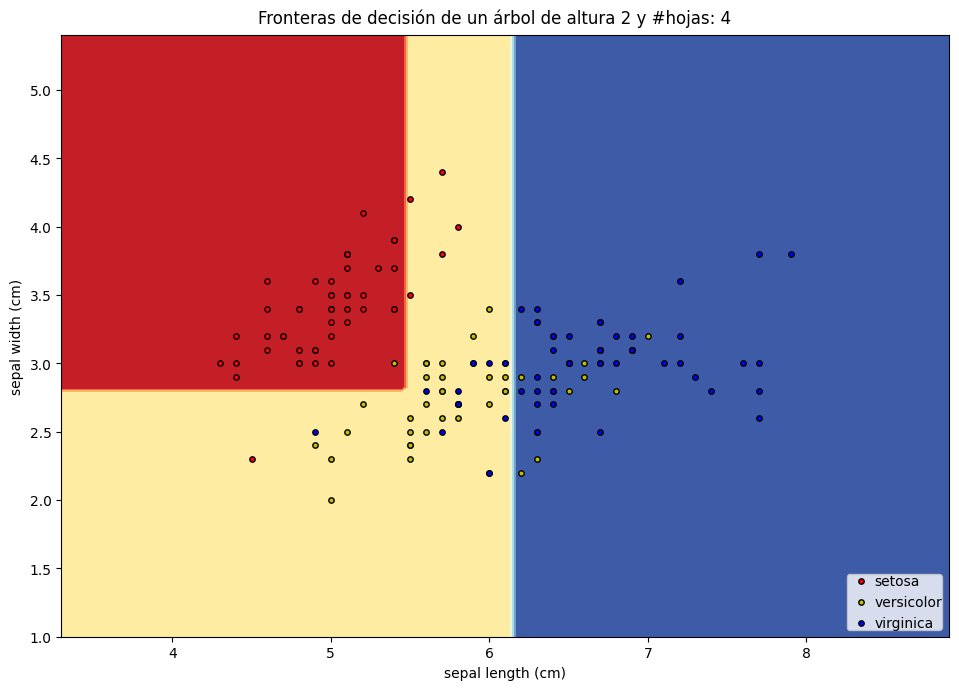

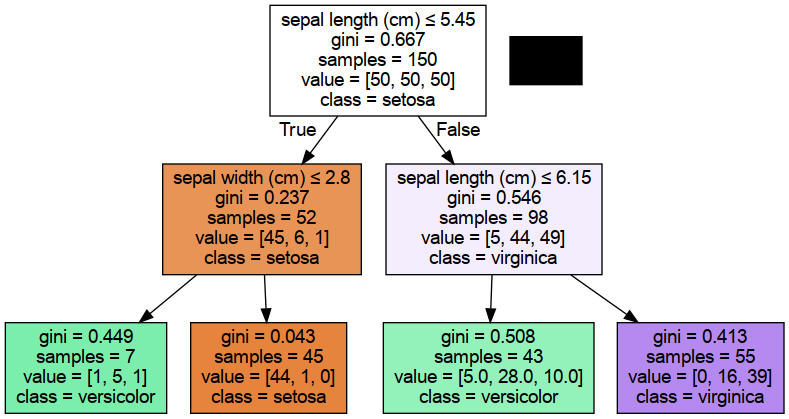

Profundidad: 3, criterio: entropy


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


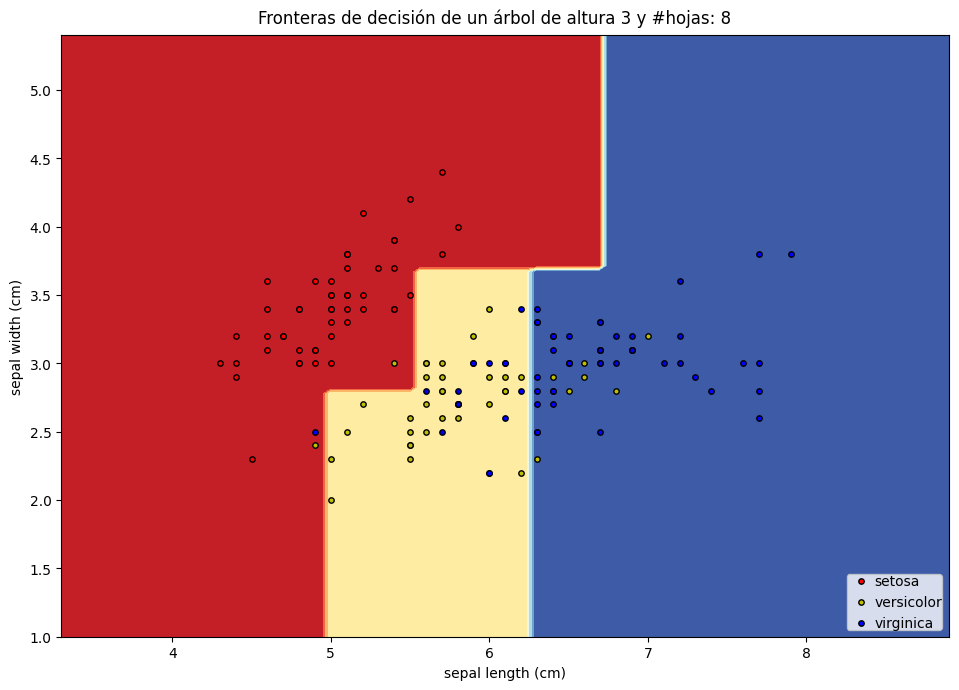

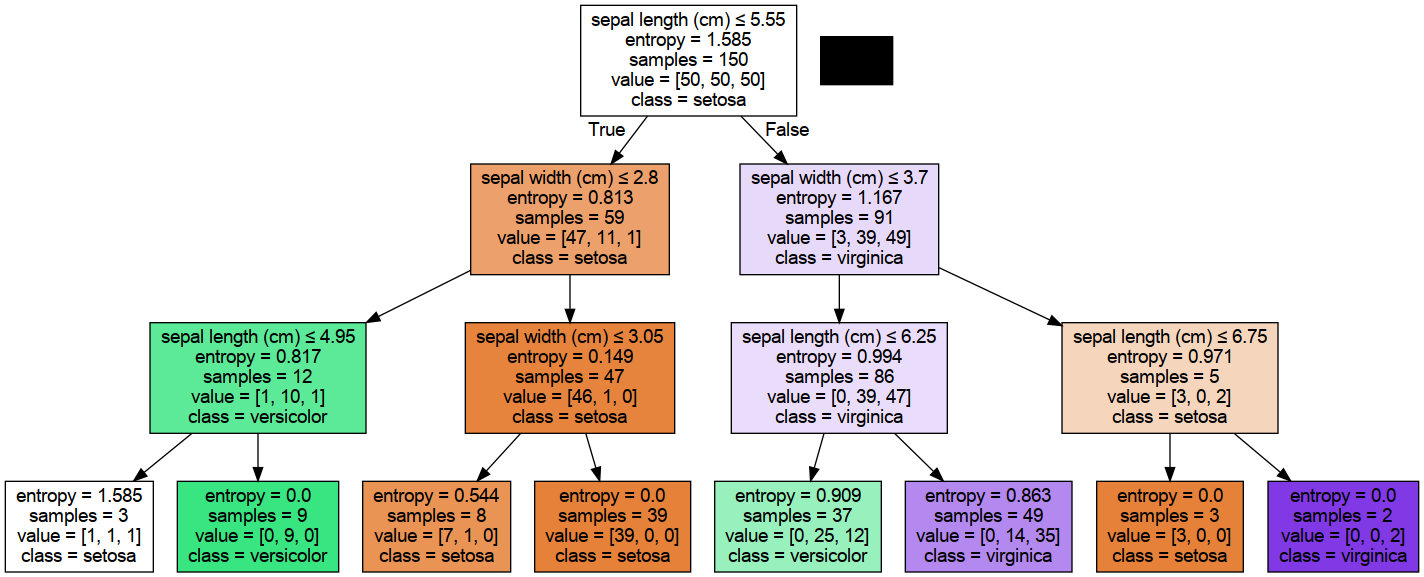

Profundidad: 3, criterio: gini


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


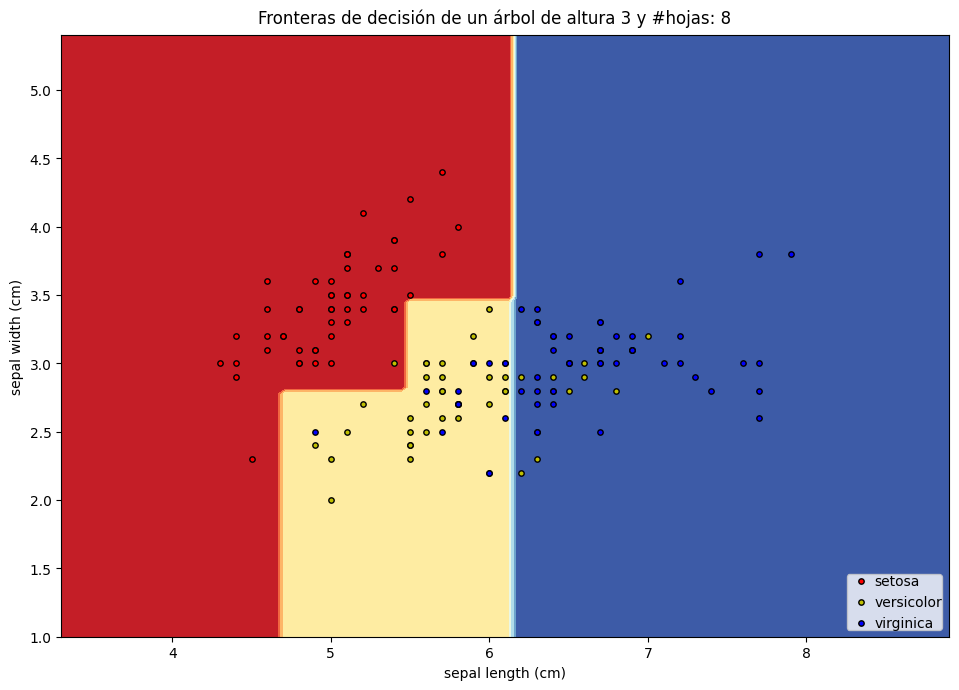

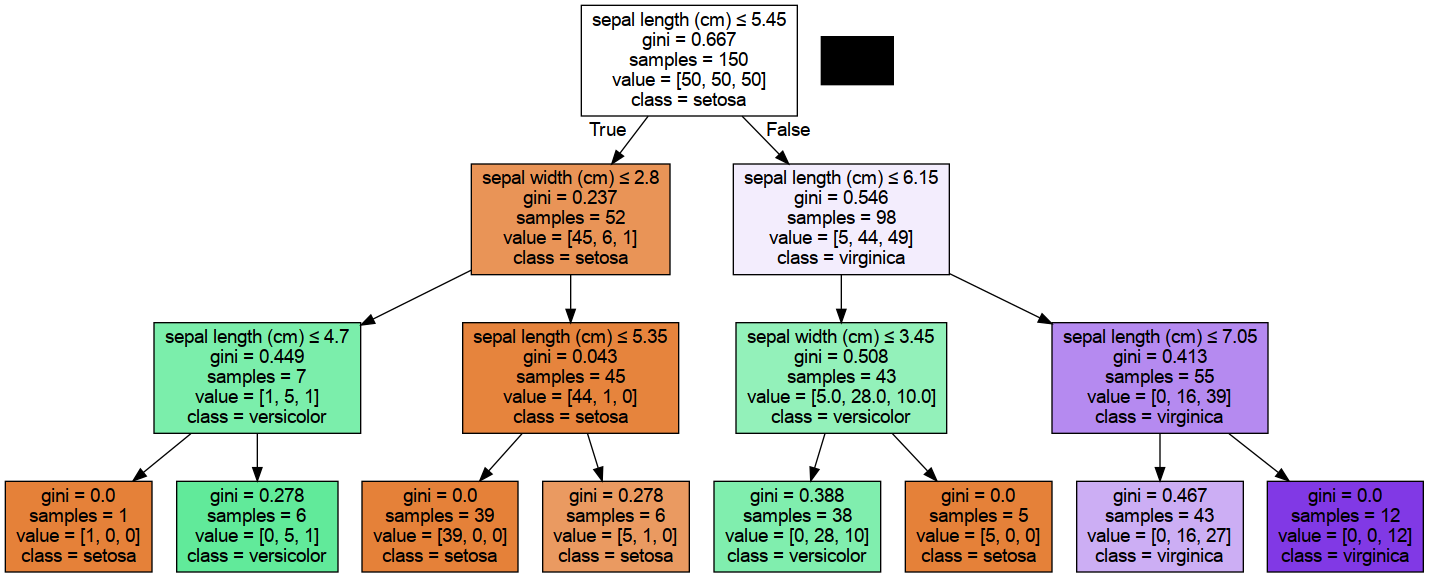

Profundidad: 4, criterio: entropy


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


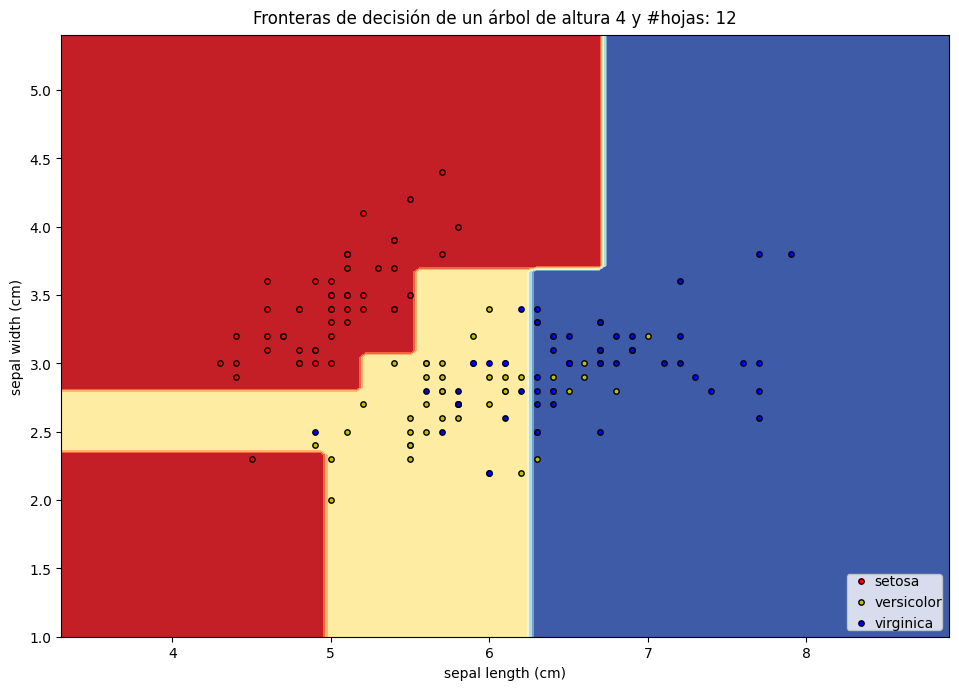

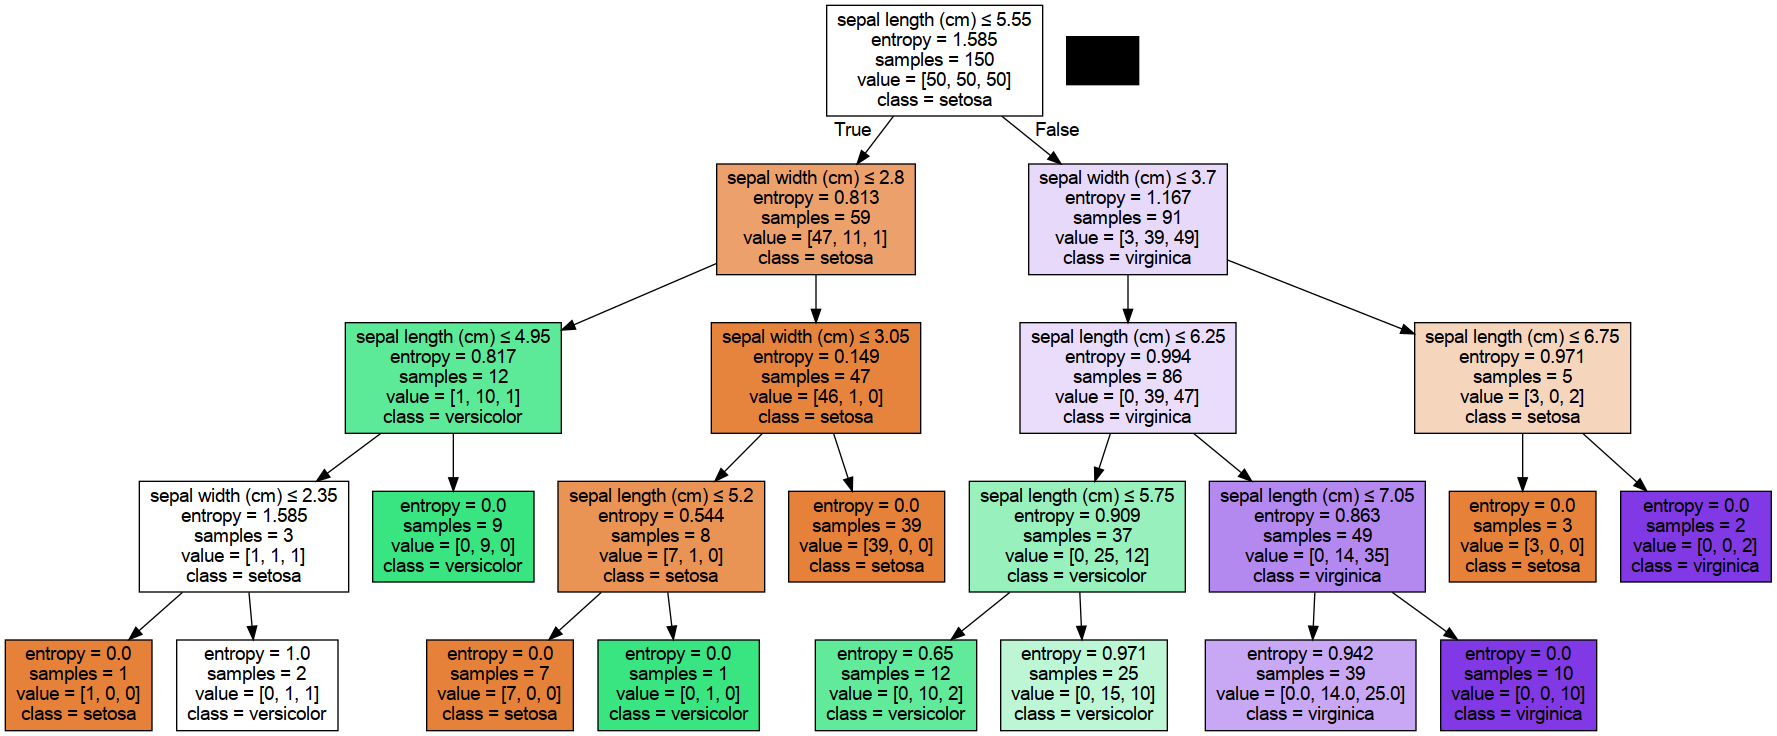

Profundidad: 4, criterio: gini


/tmp/ipykernel_252650/1955113548.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


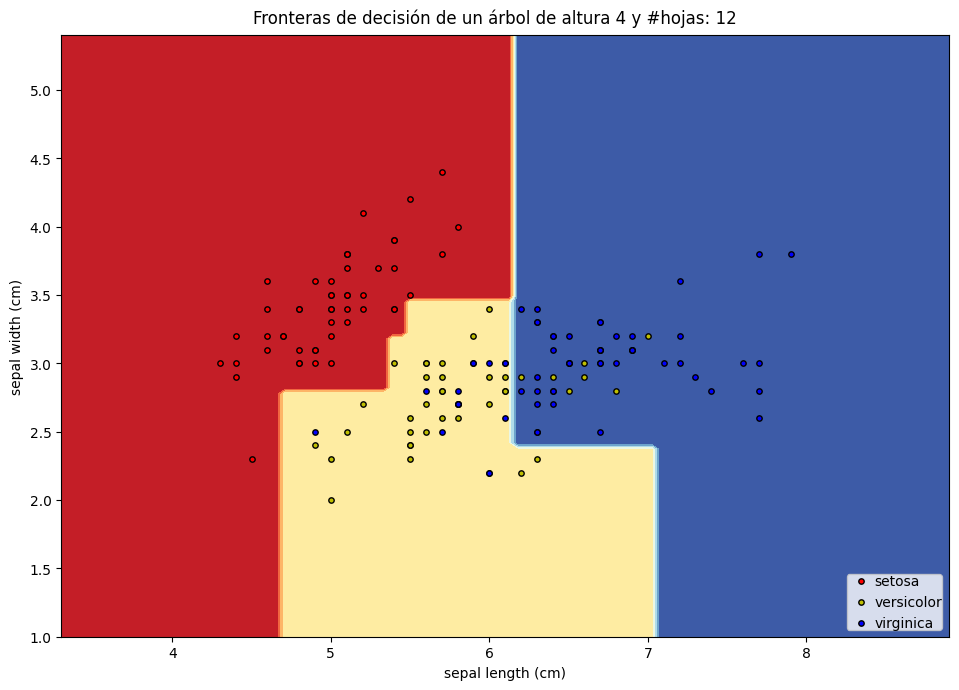

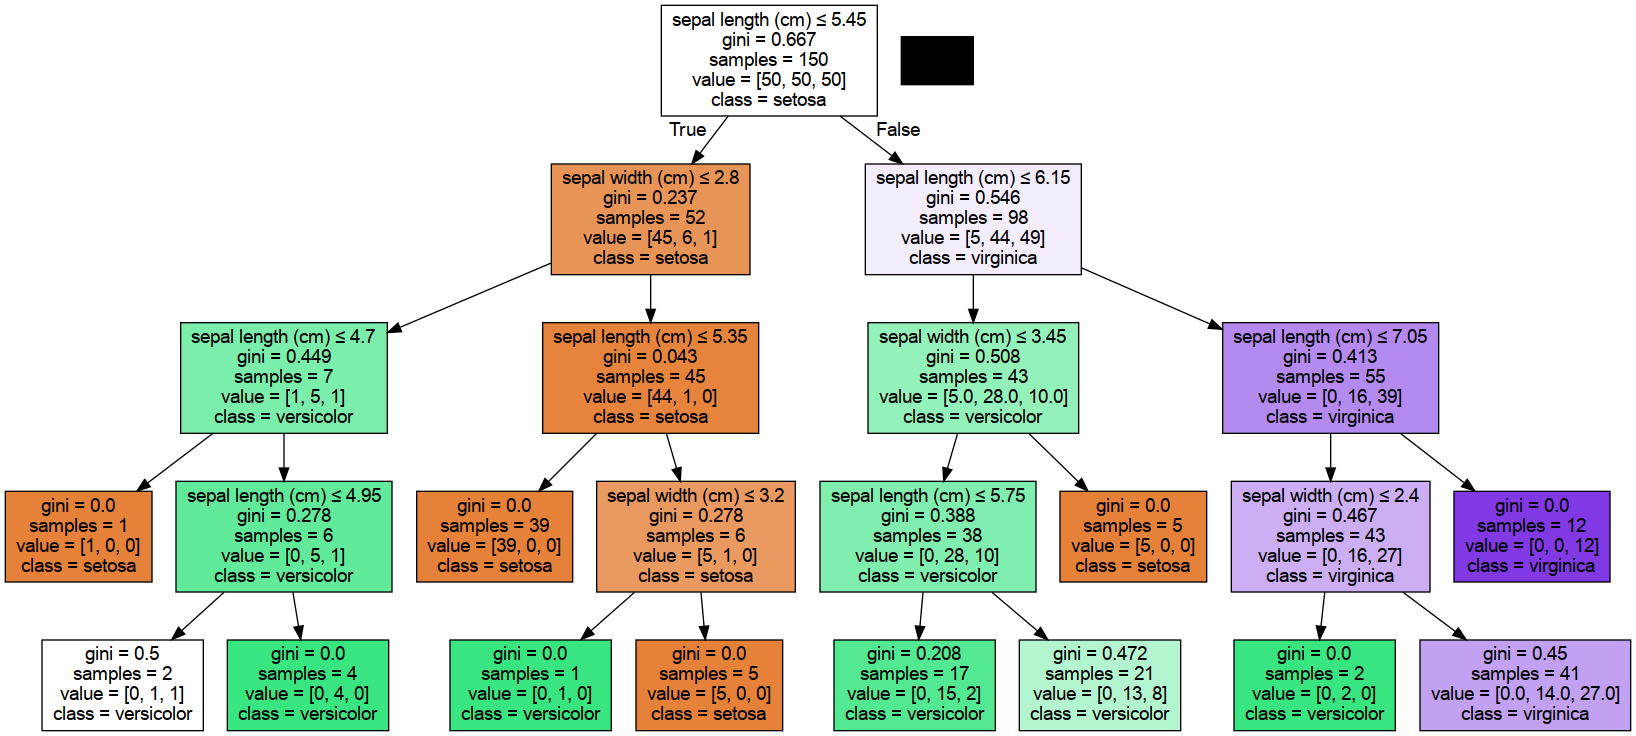

In [34]:
for i in range(1, 5):
    for criterio in ["entropy", "gini"]:
        print(f"Profundidad: {i}, criterio: {criterio}")
        explore_decision_tree_boundaries(max_depth=i, criterion=criterio)

# explore_decision_tree_boundaries()